# MINI PROJECT STATISTICS

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [54]:
fifa_stats=pd.read_csv('fifa_stats.csv')
fifa_stats

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.750000,157
1996,E. ZukanoviÄ‡,31,Bosnia Herzegovina,75,75,Genoa,Left,2,3,2,Low/ High,CB,87,6.250000,187
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.083333,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.083333,159


In [3]:
fifa_stats.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
fifa_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Name                        2000 non-null object
Age                         2000 non-null int64
Nationality                 2000 non-null object
Overall_rating              2000 non-null int64
Potential                   2000 non-null int64
Club                        1981 non-null object
Preferred Foot              2000 non-null object
International Reputation    2000 non-null int64
Weak Foot                   2000 non-null int64
Skill Moves                 2000 non-null int64
Work Rate                   2000 non-null object
Position                    2000 non-null object
Jersey Number               2000 non-null int64
Height                      2000 non-null float64
Weight                      2000 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 234.5+ KB


In [5]:
fifa_stats.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [6]:
fifa_stats.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [141]:
fifa_stats.dropna(subset=['Club'],inplace=True)

In [142]:
fifa_stats.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
Preferred Foot_ode          0
dtype: int64

In [144]:
fifa_num=fifa_stats.select_dtypes(include=np.number)
fifa_num.head(2)

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Preferred Foot_ode
0,31,94,94,5,4,4,10,5.583333,159,0.0
1,33,94,94,5,4,5,7,6.166667,183,1.0


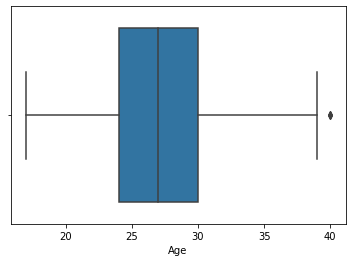

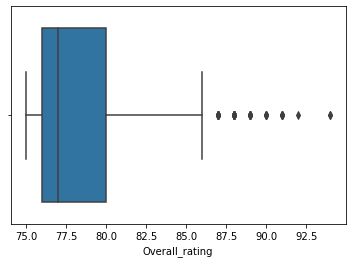

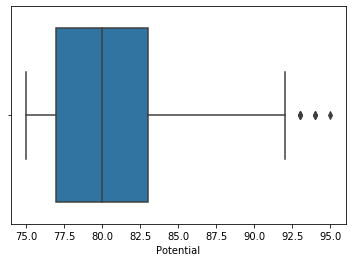

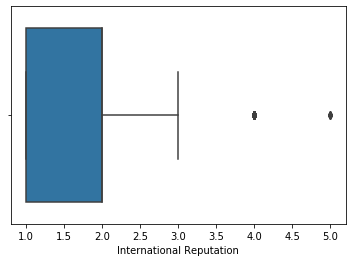

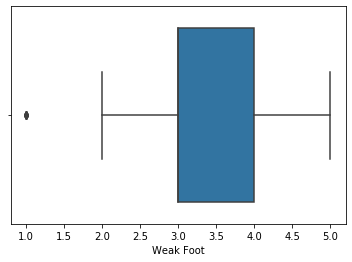

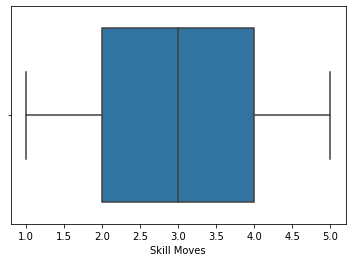

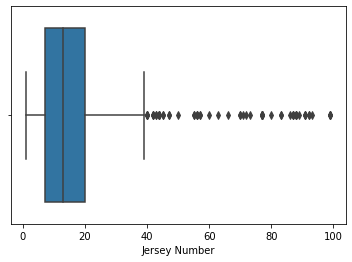

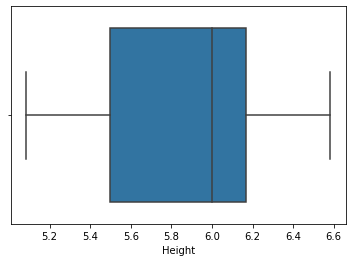

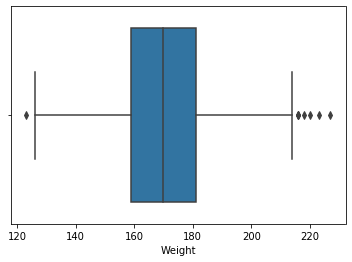

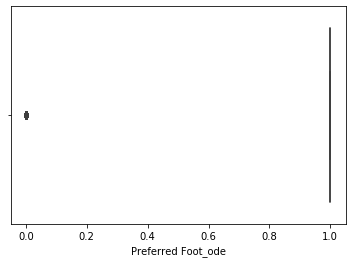

In [146]:
for i in fifa_num.columns:
    sns.boxplot(fifa_stats[i])
    plt.show()

##### 1.a)Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

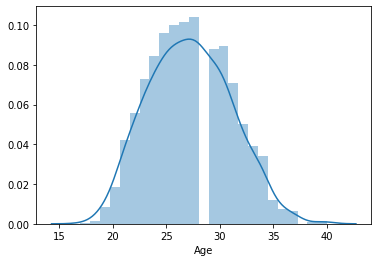

In [149]:
sns.distplot(fifa_stats['Age'])
plt.show()

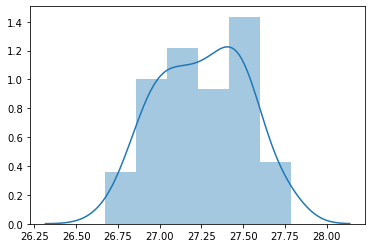

In [155]:
sample_size=200#sample Size>=200 
no_of_sample=75
sample_mean_list1=[]
for i in range(no_of_sample):
    sample=np.random.choice(fifa_stats['Age'],size=sample_size,replace=True)
    sample_mean1=np.mean(sample)
    sample_mean_list1.append(sample_mean1)
sns.distplot(sample_mean_list)
plt.show()

##### SAMPLING ERROR:-

In [17]:
mu_true=np.mean(fifa_stats['Age'])
x_bar=np.mean(sample)
sampling_err=abs(mu_true-x_bar)
print('Sampling Error',sampling_err)

Sampling Error 0.17150000000000176


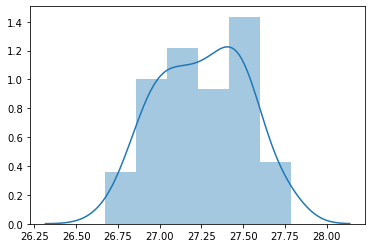

In [158]:
sample_size=200#sample Size>=200 
no_of_sample=100
sample_mean_list2=[]
for i in range(no_of_sample):
    sample=np.random.choice(fifa_stats['Age'],size=sample_size,replace=True)
    sample_mean2=np.mean(sample)
    sample_mean_list2.append(sample_mean2)
sns.distplot(sample_mean_list)
plt.show()

In [159]:
mu_true=np.mean(fifa_stats['Age'])
x_bar=np.mean(sample)
sampling_err=abs(mu_true-x_bar)
print('Sampling Error',sampling_err)

Sampling Error 0.08554770318021454


##### b)	Is there any evidence that the players overall rating is greater than 80?

In [30]:
fifa_stats[fifa_stats['Overall_rating']>80]

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,Raffael,33,Brazil,81,81,Borussia MÃ¶nchengladbach,Right,2,4,4,High/ Medium,CF,11,5.750000,152
408,Nani,31,Portugal,81,81,Sporting CP,Right,3,5,5,High/ Medium,LM,17,5.083333,150
409,J. Milner,32,England,81,81,Liverpool,Right,2,4,3,High/ High,CM,7,5.750000,154
410,J. Mathieu,34,France,81,81,Sporting CP,Left,3,2,2,High/ Medium,LCB,22,6.166667,185


In [48]:
len(fifa_stats['Age'])

2000

In [108]:
p=fifa_stats['Age']
p

0       31
1       33
2       26
3       27
4       27
        ..
1995    22
1996    31
1997    22
1998    32
1999    28
Name: Age, Length: 2000, dtype: int64

In [109]:
n=len(p)
s=stats.binom.sf(80,n,p)
s

array([nan, nan, nan, ..., nan, nan, nan])

##### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.


In [91]:
left_comp=fifa_stats[fifa_stats['Preferred Foot']=='Left']['Potential']
right_comp=fifa_stats[fifa_stats['Preferred Foot']=='Right']['Potential']

In [92]:
left_comp

0       94
13      90
15      94
17      90
19      90
        ..
1980    75
1986    80
1989    80
1994    78
1996    75
Name: Potential, Length: 466, dtype: int64

In [93]:
right_comp

1       94
2       93
3       93
4       92
5       91
        ..
1993    75
1995    82
1997    82
1998    75
1999    75
Name: Potential, Length: 1534, dtype: int64

In [95]:
stats.shapiro(left_comp)

(0.9422042369842529, 1.7173475098594682e-12)

In [94]:
stats.shapiro(right_comp)

(0.9369121193885803, 5.342442151473519e-25)

##### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].




In [ ]:
#STEP1:-HYPOTHESIS FORMATION:-
#H0:corr=0 NoRelation
#Ha:corr!=0 Relation

In [113]:
fifa_stats[['Overall_rating','Potential']].corr()

,Overall_rating,Potential
Overall_rating,1.000000,0.732695
Potential,0.732695,1.000000


In [114]:
#TEST OF NORMALITY:-SHAPIRO WILK TEST
#H0:Skew=0
#Ha:skew!=0
print(stats.shapiro(fifa_stats['Overall_rating']))
print(stats.shapiro(fifa_stats['Potential']))

(0.8525537848472595, 1.0221183102662362e-39)
(0.9384800791740417, 5.016414837142018e-28)


In [ ]:
#Both Pval<sign lvl
#Hence Ha:skew!=0 which means Data IS not Normal Hence we Go with Spearmenr Correlation

In [115]:
stats.spearmanr(fifa_stats['Overall_rating'],fifa_stats['Potential'])

SpearmanrResult(correlation=0.6904482380449665, pvalue=2.6831262205531135e-283)

In [ ]:
#pval=0
#pval<sign level which H0:corr=0 No Relation

##### INFERENCE:-
    There is No Relation between the overall rating and potential

##### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [ ]:
#GIVEN:-Skill moves(Categorical) VS Overall rating-CONTINUOUS/Discrete DATA WE CAN GO WITH ONE-WAY ANOVA
#STEP1:-HYPOTHESIS FORMATION
#H0:All Means are Equal
#Ha:Atleast One Mean are Different

In [117]:
fifa_stats['Skill Moves'].value_counts()

3    828
4    544
2    395
1    194
5     39
Name: Skill Moves, dtype: int64

In [119]:
Skill_Moves1=fifa_stats[fifa_stats['Skill Moves']==1]['Overall_rating']
Skill_Moves1

3       91
9       90
18      89
19      89
22      89
        ..
1935    75
1978    75
1985    75
1987    75
1994    75
Name: Overall_rating, Length: 194, dtype: int64

In [120]:
Skill_Moves2=fifa_stats[fifa_stats['Skill Moves']==2]['Overall_rating']
Skill_Moves2

12      90
14      89
24      89
27      88
39      88
        ..
1982    75
1983    75
1990    75
1996    75
1999    75
Name: Overall_rating, Length: 395, dtype: int64

In [121]:
Skill_Moves3=fifa_stats[fifa_stats['Skill Moves']==3]['Overall_rating']
Skill_Moves3

7       91
8       91
11      90
16      89
20      89
        ..
1986    75
1988    75
1989    75
1992    75
1993    75
Name: Overall_rating, Length: 828, dtype: int64

In [122]:
Skill_Moves4=fifa_stats[fifa_stats['Skill Moves']==4]['Overall_rating']
Skill_Moves4

0       94
4       91
5       91
6       91
10      90
        ..
1973    75
1975    75
1991    75
1995    75
1997    75
Name: Overall_rating, Length: 544, dtype: int64

In [123]:
Skill_Moves5=fifa_stats[fifa_stats['Skill Moves']==5]['Overall_rating']
Skill_Moves5

1       94
2       92
25      88
32      88
35      88
45      87
65      86
67      86
84      85
109     85
124     84
129     84
138     84
153     84
164     83
170     83
221     83
233     82
243     82
270     82
288     82
370     81
371     81
376     81
408     81
480     80
524     80
545     80
557     79
559     79
582     79
711     79
1004    77
1132    77
1143    77
1170    77
1195    77
1818    75
1998    75
Name: Overall_rating, dtype: int64

In [124]:
#TEST OF NORMALITY:-SHAPIRO WILK TEST
#H0:Skew=0
#Ha:skew!=0
print(stats.shapiro(Skill_Moves1))
print(stats.shapiro(Skill_Moves2))
print(stats.shapiro(Skill_Moves3))
print(stats.shapiro(Skill_Moves4))
print(stats.shapiro(Skill_Moves5))

(0.8774232268333435, 1.8515439181854276e-11)
(0.8366187810897827, 9.018591891126539e-20)
(0.8169044256210327, 1.1966104423348091e-29)
(0.89353346824646, 5.833666454611851e-19)
(0.9650622010231018, 0.2619292140007019)


In [ ]:
#All pval are not greater than sign lvl hence Ha:Skew!=0 i.e Data is Not Normal

In [125]:
#TEST OF VARIANCE:-Equal Variance:Levene Test
#Ho:All Data Variance are Equal
#Ha:All Data Variance not Equal 
stats.levene(Skill_Moves1,Skill_Moves2,Skill_Moves3,Skill_Moves4,Skill_Moves5)

LeveneResult(statistic=9.982774544928226, pvalue=5.345915558006616e-08)

In [ ]:
#pval not greater than sign lvl hence Ha-All Data Have Variance are not Equal
#All Variance are Equal

In [126]:
#STEP2:-ANOVA F-Test:-
stats.f_oneway(Skill_Moves1,Skill_Moves2,Skill_Moves3,Skill_Moves4,Skill_Moves5)

F_onewayResult(statistic=31.085141826531746, pvalue=3.8236370526660514e-25)

In [ ]:
#STEP3:-PVALUE:-
#pval=0
#sign lvl=0.05
#pval<sign val H0 is Rejected,Ha is Selected which means Atleast one Data mean is Different

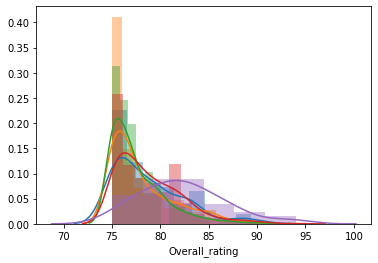

In [127]:
sns.distplot(Skill_Moves1)
sns.distplot(Skill_Moves2)
sns.distplot(Skill_Moves3)
sns.distplot(Skill_Moves4)
sns.distplot(Skill_Moves5)
plt.show()

##### INFERENCE:-
    Skill move Does Not have any effect in overall rating

In [129]:
phone=pd.read_csv('phone.csv')
phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


##### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [135]:
n=len(np.array(phone['duration']))
sigma=np.mean(phone)
x_bar=np.mean(phone['duration'])
confidence_lvl=0.99
z=stats.norm.isf(0.05)
ll=x_bar-(z*(sigma/(n**0.5)))
ul=x_bar+(z*(sigma/(n**0.5)))
print(ll,ul)

duration    136.015947
dtype: float64 duration    152.593924
dtype: float64


In [136]:
n=len(np.array(phone['duration']))
sigma=np.mean(phone)
x_bar=np.mean(phone['duration'])
confidence_lvl=0.95
z=stats.norm.isf(0.05)
ll=x_bar-(z*(sigma/(n**0.5)))
ul=x_bar+(z*(sigma/(n**0.5)))
print(ll,ul)

duration    136.015947
dtype: float64 duration    152.593924
dtype: float64


##### Range estimate of average duration calls made by all the network are Same For Both 95% and 99% Confidence Interval 

##### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [139]:
phone['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)